## Analyze hospital admissions to determine peak months, major patient age groups, and average cost per medical condition




In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [256]:
data=pd.read_csv('fixed_cleaned_healthcare_dataset.csv',parse_dates=['Date Of Admission','Discharge Date'])
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date Of Admission,Doctor,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Provider Names
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,Sons and Miller
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,Kim Inc
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,Cook PLC
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,Hernandez Rogers and Vang
4,Adrienne Bell,43,Female,Ab+,Cancer,2022-09-19,Kathleen Hanna,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,White-White


In [257]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54966 entries, 0 to 54965
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                54966 non-null  object        
 1   Age                 54966 non-null  int64         
 2   Gender              54966 non-null  object        
 3   Blood Type          54966 non-null  object        
 4   Medical Condition   54966 non-null  object        
 5   Date Of Admission   54966 non-null  datetime64[ns]
 6   Doctor              54966 non-null  object        
 7   Insurance Provider  54966 non-null  object        
 8   Billing Amount      54966 non-null  float64       
 9   Room Number         54966 non-null  int64         
 10  Admission Type      54966 non-null  object        
 11  Discharge Date      54966 non-null  datetime64[ns]
 12  Medication          54966 non-null  object        
 13  Test Results        54966 non-null  object    

In [258]:
#Convert some data objects into category
categorical_columns=['Gender','Medical Condition','Insurance Provider','Admission Type','Medication','Test Results','Blood Type']
for col in categorical_columns:
    data[col]=data[col].astype('category')

In [259]:
data.dtypes

Name                          object
Age                            int64
Gender                      category
Blood Type                  category
Medical Condition           category
Date Of Admission     datetime64[ns]
Doctor                        object
Insurance Provider          category
Billing Amount               float64
Room Number                    int64
Admission Type              category
Discharge Date        datetime64[ns]
Medication                  category
Test Results                category
Provider Names                object
dtype: object

In [260]:
medical_condition=data.groupby('Medical Condition',observed=True)
medical_condition.size()

Medical Condition
Arthritis       9218
Asthma          9095
Cancer          9140
Diabetes        9216
Hypertension    9151
Obesity         9146
dtype: int64

## Categorize ages into age groups ##

In [261]:
def age_group(age):
    if age <13:
        return 'Children'
    elif 13<=age<=18:
        return 'Teenagers'
    elif 19<= age <=24:
        return 'Young Adults'
    elif 25<=age<=64:
        return 'Adults'
    elif age>=65:
        return 'Seniors'
   

In [262]:
age_groups=data['Age'].apply(age_group)
age_groups.unique()

array(['Adults', 'Seniors', 'Young Adults', 'Teenagers'], dtype=object)

In [263]:
counts=age_groups.value_counts()
counts

Age
Adults          32383
Seniors         16923
Young Adults     4774
Teenagers         886
Name: count, dtype: int64

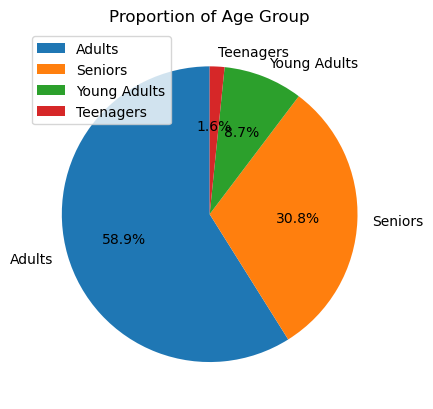

In [264]:
counts.plot(kind='pie',legend=True,labels=counts.index,autopct='%1.1f%%',startangle=90,)
plt.title('Proportion of Age Group')
plt.ylabel('')
plt.show()

#### Among the patients, adults represent the majority age group, indicating that most healthcare services in this dataset are utilized by individuals aged 25–64. ####

#### Find the longest stay

In [265]:
#Calculate the length of hospital stay
data['Stay Length']=data['Discharge Date']-data['Date Of Admission']
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date Of Admission,Doctor,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Provider Names,Stay Length
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,Sons and Miller,2 days
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,Kim Inc,6 days
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,Cook PLC,15 days
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,Hernandez Rogers and Vang,30 days
4,Adrienne Bell,43,Female,Ab+,Cancer,2022-09-19,Kathleen Hanna,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,White-White,20 days


In [266]:
#Find the longest stay
max_stay=data['Stay Length'].max()
long_stay=data[data['Stay Length']==max_stay]
len(long_stay)

1854

In [267]:
max_stay

Timedelta('30 days 00:00:00')

### This analysis focuses exlusively on patients with the longest hospital stays

#Create a new DataFrame with the longest stay (30 days)
longest_stay=data[data['Stay Length']==max_stay]
longest_stay=longest_stay.reset_index(drop=True)
longest_stay.head()

### Maximum and Minimum Billing Amount by Gender, Condition, and Insurance Provider

In [268]:
pivots=longest_stay.pivot_table(values='Billing Amount',index=['Gender','Medical Condition'],columns='Insurance Provider',aggfunc='max',observed=False)
pivots.style.highlight_max(axis=1, color='orange')\
    .highlight_min(axis=1,color='lightgreen')


In [269]:
highest_per_group=pivots.idxmax(axis=1)#which column has the max for each row
max_value=pivots.max(axis=1)#the actual highest value
summary=pd.DataFrame({
    'Top Insurance Provider':highest_per_group,
    'Max Billing Amount':max_value
})
summary

Top Insurance Provider  Max Billing Amount
Gender Medical Condition                                           
Female Arthritis                     Blue Cross        50881.655891
       Asthma                             Cigna        48566.821194
       Cancer                        Blue Cross        49782.607469
       Diabetes                Unitedhealthcare        50937.250333
       Hypertension                    Medicare        50192.217067
       Obesity                         Medicare        49124.277713
Male   Arthritis                       Medicare        50759.677601
       Asthma                        Blue Cross        50003.870447
       Cancer                          Medicare        50296.787062
       Diabetes                           Cigna        50060.724676
       Hypertension            Unitedhealthcare        49827.519768
       Obesity                            Aetna        50068.818951

In [270]:
summary_reset=summary.reset_index()


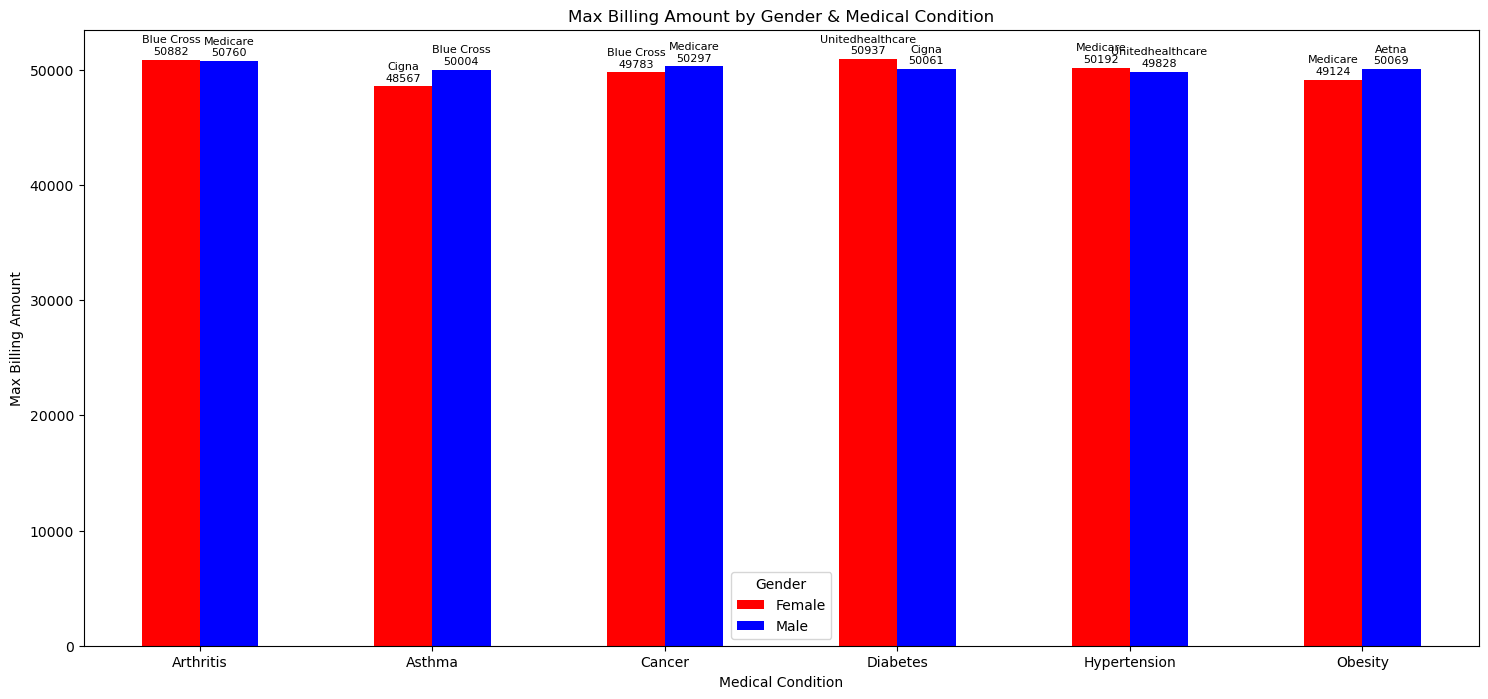

In [282]:
pivot_amount=summary_reset.pivot(index='Medical Condition', columns='Gender', values='Max Billing Amount')
pivot_provider=summary_reset.pivot(index='Medical Condition', columns='Gender', values='Top Insurance Provider')

# Plot grouped bar chart
colors = ['red', 'blue']
ax = pivot_amount.plot(kind='bar', figsize=(18,8), color=colors)

# Add labels: provider + amount
for container, gender in zip(ax.containers, ['Female','Male']):
    for bar, cond in zip(container, pivot_amount.index):
        height = bar.get_height()
        provider = pivot_provider.loc[cond, gender]
        ax.text(bar.get_x() + bar.get_width()/2, height + 300, f"{provider}\n{height:.0f}",
                ha='center', va='bottom', fontsize=8)
        
plt.title('Max Billing Amount by Gender & Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Max Billing Amount')
plt.xticks(rotation=0)
plt.legend(title='Gender')

plt.show()



In [272]:
#Group Conditions
condidionts=longest_stay.groupby('Medical Condition',observed=True)
conditions.size().idxmax()

'Cancer'

In [273]:
#Count total cost of Billing Amount and its average
billing_stats=conditions['Billing Amount'].agg(['sum', 'mean'])
billing_stats

,sum,mean
Medical Condition,,
Arthritis,7.558552e+06,24620.691989
Asthma,7.385640e+06,24294.867840
Cancer,8.273755e+06,24551.203246
Diabetes,8.620194e+06,26854.187515
Hypertension,6.779369e+06,25016.122381
Obesity,8.549580e+06,27227.962801


In [274]:
two_most_expensive=billing_stats.nlargest(n=2,columns=['sum','mean'])
two_most_expensive

,sum,mean
Medical Condition,,
Diabetes,8.620194e+06,26854.187515
Obesity,8.549580e+06,27227.962801


In [275]:
#Extracting month names from the "Date of Admission" column and creating a new column "Admission Months"
longest_stay['Admission Months']=longest_stay['Date Of Admission'].dt.month_name()
longest_stay.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date Of Admission,Doctor,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Provider Names,Stay Length,Admission Months
0,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,Hernandez Rogers and Vang,30 days,November
1,Christopher Berg,58,Female,Ab-,Cancer,2021-05-23,Heather Day,Unitedhealthcare,19784.631062,249,Elective,2021-06-22,Paracetamol,Inconclusive,Padilla-Walker,30 days,May
2,Sean Jennings,80,Female,Ab-,Diabetes,2023-11-12,James Tucker,Blue Cross,20257.544283,255,Elective,2023-12-12,Penicillin,Abnormal,Clark-Johnson,30 days,November
3,April Valencia,42,Male,A+,Diabetes,2024-01-04,Lonnie Morgan,Medicare,22356.226492,310,Urgent,2024-02-03,Aspirin,Inconclusive,Levine-Miller,30 days,January
4,Rita Archer,20,Male,O-,Diabetes,2024-01-05,Victoria Gonzales,Medicare,48995.980592,406,Elective,2024-02-04,Lipitor,Normal,Marquez Silva Smith,30 days,January


In [276]:
month_count=longest_stay['Admission Months'].value_counts()
month_counts=pd.DataFrame(month_count)


Text(0.5, 1.0, 'Total Number of Admissions in Each Month')

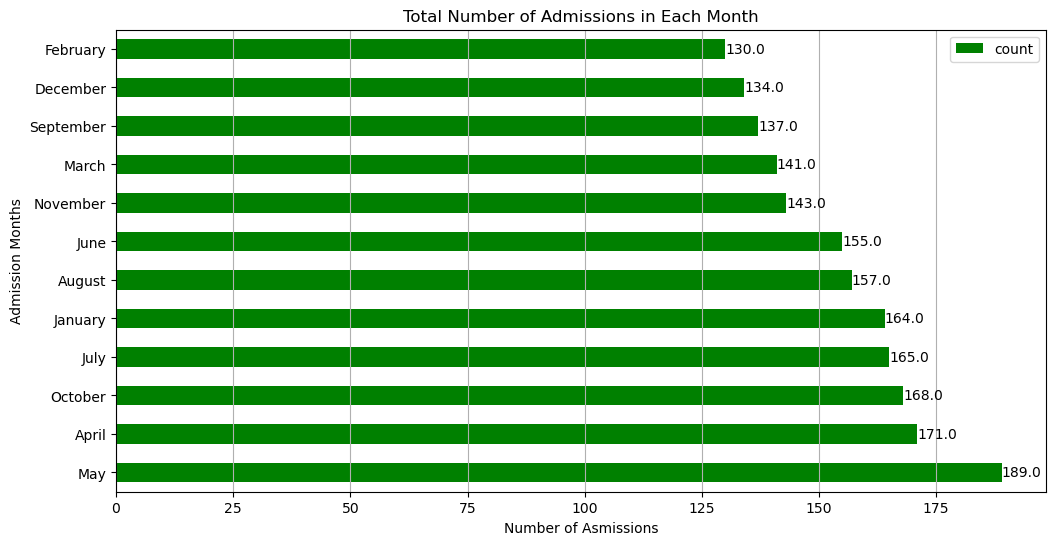

In [283]:

ax=month_counts.plot(kind='barh',figsize=(12,6),color='g')

for container in  ax.containers:
    ax.bar_label(container,fmt='%.1f',color='black')
plt.ylabel('Admission Months')
plt.xlabel('Number of Asmissions')
plt.grid(axis='x')
plt.title('Total Number of Admissions in Each Month')


### From the plot, it is evident that May and April have the highest number of admissions compared to other months. This indicates that patient admissions peak during these months, which may be important for resource planning and staffing in the hospital.

In [278]:
#Check overlap
mask_obesity=longest_stay[longest_stay['Medical Condition']=='Obesity']['Name']
mask_diabetes=longest_stay[longest_stay['Medical Condition']=='Diabetes']['Name']
mask_cancer=longest_stay[longest_stay['Medical Condition']=='Cancer']['Name']
patients_cancer=mask_cancer.tolist()
patients_diabetes=mask_diabetes.tolist()
patients_obesity=mask_obesity.tolist()

In [279]:
overlap_cancer_diabetes=mask_cancer.isin(patients_diabetes)
overlap_cancer_diabetes.value_counts()

Name
False    335
True       2
Name: count, dtype: int64

In [280]:
overlap_cancer_obesity=mask_cancer.isin(patients_obesity)
overlap_cancer_obesity.value_counts()

Name
False    337
Name: count, dtype: int64

In [281]:
overlap_diabetes_obesity=mask_diabetes.isin(patients_obesity)
overlap_diabetes_obesity.value_counts()


Name
False    320
True       1
Name: count, dtype: int64

### Findings Summary: ###
 #### - Adults make up the largest age group, showing that most healthcare services in this general dataset are used by people aged 25–64
 #### - The most frequent medical condition among patients in 'longest_stay' (30 days) is Cancer
 #### - However, Diabetes and Obesity is associated with the highest amount of billing amounts
 #### - Only three patients in the 'longest_stay' dataset have overlapping diagnoses among these conditions, suggesting that co-occurrence is rare and does not significantly impact the overall analysis
 #### - The highest number of admissions occurs in May and April